<h1 align="center">Previsão do Time Vencedor<h/1>

<h3>Regressão Logística</h3>
<p>
    Pelo fato do resultado ser atrelado em vencedor e perdedor, acreditei que a melhor opção seria a utilização da regressão logística.<br /><br />
    Além de ter recurso que nos permite estimar a probabilidade associada à ocorrência de determinado evento.
</p>

<p>Seguem as vantagens:</p>
<ul>
  <li>Facilidade para lidar com variáveis independentes categóricas.</li>
  <li>Fornece resultados em termos de probabilidade.</li>
  <li>Facilidade de classificação de indivíduos em categorias.</li>
  <li>Requer pequeno número de suposições.</li>
  <li>Alto grau de confiabilidade.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Leitura do csv criado na parte 2
df_campeonato = pd.read_csv('df_campeonato.csv',sep=';', encoding='utf-8')

In [3]:
# Carga dos dados de 20017
df_cmp = pd.read_csv('brasileirao-seriea-2017.txt', delimiter=';')

In [4]:
# Visão dos dados
df_cmp.head()

,TimeCasa,GolCasa,GolVisitante,TimeVisitante
0,flamengo,1,1,atleticoMg
1,corinthians,1,1,chapecoense
2,fluminense,3,2,santos
3,palmeiras,4,0,vaco
4,cruzeiro,1,0,sao paulo


In [5]:
# Criação das variáveis
vencedor = []
qt_registros = df_campeonato.shape[0]

In [6]:
# Inclusão da coluna "VencedorPartida" para apresentar o vencedor da partida a partir da pontuação
for i in range(qt_registros):
    
    if df_campeonato['GolCasa'][i] > df_campeonato['GolVisitante'][i]:
        vencedor.append(df_campeonato['TimeCasa'][i])
        
    elif df_campeonato['GolCasa'][i] < df_campeonato['GolVisitante'][i]:
        vencedor.append(df_campeonato['TimeVisitante'][i])
        
    else:
        vencedor.append('empate')

df_campeonato['VencedorPartida'] = vencedor

In [7]:
# Visualização dos dados 
df_campeonato.loc[:2]

,Rodada,Hora,DataPartida,DiaSemana,Ano,Arena,TimeCasa,GolCasa,TimeVisitante,GolVisitante,FinalCasa,FinalVisitante,VencedorPartida
0,1,16h00,29/03/2003,sabado,2003,brinco de ouro,guarani,4,vasco,2,v,d,guarani
1,1,16h00,29/03/2003,sabado,2003,arena da baixada,athleticoPr,2,gremio,0,v,d,athleticoPr
2,1,16h00,30/03/2003,domingo,2003,maracana,flamengo,1,coritiba,1,e,e,empate


In [8]:
# Cria nova dataframe, apagando as colunas que não serão utilizadas para preedição.
df_resultados = df_campeonato.drop(['Rodada',
                               'Hora',
                               'DataPartida',
                               'DiaSemana',
                               'Ano',
                               'Arena',
                               'GolCasa',
                               'GolVisitante',
                               'FinalCasa',
                               'FinalVisitante'],axis=1)

In [9]:
# Retorno dos dados no novo dataframe
df_resultados.head()

,TimeCasa,TimeVisitante,VencedorPartida
0,guarani,vasco,guarani
1,athleticoPr,gremio,athleticoPr
2,flamengo,coritiba,empate
3,goias,paysandu,empate
4,internacional,ponte preta,empate


In [10]:
# Limpeza dos espaços
df_resultados.TimeCasa = df_resultados.TimeCasa.str.strip()
df_resultados.TimeVisitante = df_resultados.TimeVisitante.str.strip()
df_resultados.VencedorPartida = df_resultados.VencedorPartida.str.strip()

In [11]:
# Visualização dos dados depois do tratamento
df_resultados.query('TimeCasa == "palmeiras"').head()

,TimeCasa,TimeVisitante,VencedorPartida
556,palmeiras,atleticoMg,empate
586,palmeiras,vitoria,empate
605,palmeiras,ponte preta,palmeiras
639,palmeiras,coritiba,palmeiras
653,palmeiras,vasco,empate


In [12]:
# Reseta o indice
df_resultados = df_resultados.reset_index(drop=True)

In [13]:
# Para a coluna VencedorPartido, haverá a seguinte modificação:
# Vencedor(Empate)         -> 0
# Vencedor(Time Visitante) -> 1
# Vencedor(Time da Casa)   -> 2

# Pontos de corte
df_resultados.loc[df_resultados.VencedorPartida == 'empate', 'VencedorPartida']= 0
df_resultados.loc[df_resultados.VencedorPartida == df_resultados.TimeVisitante, 'VencedorPartida']= 1
df_resultados.loc[df_resultados.VencedorPartida == df_resultados.TimeCasa,'VencedorPartida']= 2

In [14]:
# Visualização dos dados
df_resultados.head()

,TimeCasa,TimeVisitante,VencedorPartida
0,guarani,vasco,2
1,athleticoPr,gremio,2
2,flamengo,coritiba,0
3,goias,paysandu,0
4,internacional,ponte preta,0


In [15]:
# Conversão das colunas TimeCasa e TimeVisitante para números e efetua a distribuição categórica dos dados para cada time
final = pd.get_dummies(df_resultados, prefix=['TimeCasa', 'TimeVisitante'], columns=['TimeCasa', 'TimeVisitante'])
final.head()

,VencedorPartida,TimeCasa_americaMg,TimeCasa_americaRn,TimeCasa_athleticoPr,TimeCasa_atleticoGo,TimeCasa_atleticoMg,TimeCasa_avai,TimeCasa_bahia,TimeCasa_barueri,TimeCasa_botafogo,...,TimeVisitante_santo s,TimeVisitante_santos,TimeVisitante_sao caetano,TimeVisitante_sao paulo,TimeVisitante_saopaulo,TimeVisitante_sport,TimeVisitante_sport recife,TimeVisitante_vasco,TimeVisitante_vitoria,TimeVisitante_vitoriaBa
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Separação dos dados
x = final.drop(['VencedorPartida'], axis=1)
y = final["VencedorPartida"]
y = y.astype('int')

# Treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=5)

In [17]:
# Impressão do shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(4029, 106) (1728, 106) (4029,) (1728,)


<h3>Importação do modelo LogisticRegression</h3>

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [19]:
# Instanciação da classe e construção do modelo de Regressão
mdlRegr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class = 'auto')

In [20]:
# Treinamento do modelo
mdlRegr.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Passagem dos dados pelo algoritmo e verificação da porcentagem
score = mdlRegr.score(x_treino, y_treino)
score2 = mdlRegr.score(x_teste, y_teste)

print("Percentual de Treino: {:.3f}%".format(score))
print("Percentual de Teste: {:.3f}%".format(score2))

Percentual de Treino: 0.527%
Percentual de Teste: 0.495%


In [22]:
# Visu
df_cmp.head()

,TimeCasa,GolCasa,GolVisitante,TimeVisitante
0,flamengo,1,1,atleticoMg
1,corinthians,1,1,chapecoense
2,fluminense,3,2,santos
3,palmeiras,4,0,vaco
4,cruzeiro,1,0,sao paulo


In [ ]:
df_pred = df_cmp.drop(['GolCasa','GolVisitante'], axis=1)

In [ ]:
df_pred["VencedorPartida"] = np.NaN
df_pred_bkp = df_pred

In [23]:
df_cmp = df_cmp.drop(['GolCasa','GolVisitante'], axis=1)

In [24]:
df_cmp["VencedorPartida"] = np.NaN
df_cmp_bkp = df_cmp

In [ ]:
# Descomentar quando for rodar novamente
# del df_pred

In [25]:
# Conversão das colunas TimeCasa e TimeVisitante para números e efetua a distribuição categórica dos dados para cada time
df_cmp = pd.get_dummies(df_cmp, prefix=['TimeCasa', 'TimeVisitante'], columns=['TimeCasa', 'TimeVisitante'])

#df_pred.head()

# Adicione colunas ausentes comparadas ao conjunto de dados de treinamento do modelo
colunas = set(final.columns) - set(df_cmp.columns)
for c in colunas:
    df_cmp[c] = 0
df_cmp = df_cmp[final.columns]

# Remove coluna do time vencedor
df_cmp = df_cmp.drop(['VencedorPartida'], axis=1)

df_cmp.head()

,TimeCasa_americaMg,TimeCasa_americaRn,TimeCasa_athleticoPr,TimeCasa_atleticoGo,TimeCasa_atleticoMg,TimeCasa_avai,TimeCasa_bahia,TimeCasa_barueri,TimeCasa_botafogo,TimeCasa_brasiliense,...,TimeVisitante_santo s,TimeVisitante_santos,TimeVisitante_sao caetano,TimeVisitante_sao paulo,TimeVisitante_saopaulo,TimeVisitante_sport,TimeVisitante_sport recife,TimeVisitante_vasco,TimeVisitante_vitoria,TimeVisitante_vitoriaBa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Conversão das colunas TimeCasa e TimeVisitante para números e efetua a distribuição categórica dos dados para cada time
df_pred = pd.get_dummies(df_pred, prefix=['TimeCasa', 'TimeVisitante'], columns=['TimeCasa', 'TimeVisitante'])

#df_pred.head()

# Adicione colunas ausentes comparadas ao conjunto de dados de treinamento do modelo
colunas = set(final.columns) - set(df_pred.columns)
for c in colunas:
    df_pred[c] = 0
df_pred = df_pred[final.columns]

# Remove coluna do time vencedor
df_pred = df_pred.drop(['VencedorPartida'], axis=1)

df_pred.head()

In [26]:
# Criação da lista com o nome dos times e a pontuação iniciada em 0
NomeTimes = [("athleticoPr",0),("atleticoGo",0),("atleticoMg",0),("avai",0),("bahia",0),("botafogo",0),("chapecoense",0),
             ("corinthians",0),("coritiba",0),("cruzeiro",0),("flamengo",0),("fluminense",0),("gremio",0),("palmeiras",0),
             ("ponte preta",0),("santos",0),("sao paulo",0),("sport",0),("vaco",0),("vitoria",0)]

In [27]:
# Criação do dataframe com todos os nomes dos times classificados por ordem alfabética
df_classificacao = pd.DataFrame(NomeTimes, columns=["Time","Pontuacao"])

In [28]:
# Visão rápida dos regristros
df_classificacao.head()

,Time,Pontuacao
0,athleticoPr,0
1,atleticoGo,0
2,atleticoMg,0
3,avai,0
4,bahia,0


In [29]:
# Percorrer o dataframe df_pred_bkp para buscar a posição dos times para o jogo em questão

# Variável com o resultado
resultado = mdlRegr.predict(df_cmp)
pt0 = 0
pt1 = 0

# Vencedor(Empate)         -> 0
# Vencedor(Time Visitante) -> 1
# Vencedor(Time da Casa)   -> 2

for i in range(df_cmp_bkp.shape[0]):
    
    print(df_cmp_bkp.iloc[i, 0] + " x " + df_cmp_bkp.iloc[i, 1])
    
    # Empate
    if resultado[i] == 0:        
        print("Empate")
        
        # Recupera a pontuação atual e soma 1 ponto pelo empate
        pt0 = df_classificacao.Pontuacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 0]]
        pr1 = df_classificacao.Pontuacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 1]]
        
        df_classificacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 0], "Pontuacao"] = pt0 + 1
        df_classificacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 1], "Pontuacao"] = pr1 + 1
        
    
    elif resultado[i] == 1:
        print("Vencedor Visitante: " + df_cmp_bkp.iloc[i, 1])
        # Recupera a pontuação atual e soma 1 ponto pelo empate
        pr1 = df_classificacao.Pontuacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 1]]
        
        df_classificacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 1], "Pontuacao"] = pr1 + 3
        
    elif resultado[i] == 2:
        print("Vencedor Casa: " + df_cmp_bkp.iloc[i, 0])
        # Recupera a pontuação atual e soma 1 ponto pelo empate
        pr1 = df_classificacao.Pontuacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 0]]
        
        df_classificacao.loc[df_classificacao.Time == df_cmp_bkp.iloc[i, 0], "Pontuacao"] = pr1 + 3
    
    print('Probabilidade ' + df_cmp_bkp.iloc[i, 1] + ' vencer: ', '%.2f'%(mdlRegr.predict_proba(df_cmp)[i][1]))
    print('Probabilidade de empate: ', '%.3f'%(mdlRegr.predict_proba(df_cmp)[i][1]))
    print('Probabilidade de ' + df_cmp_bkp.iloc[i, 0] + ' vencer: ', '%.3f'%(mdlRegr.predict_proba(df_cmp)[i][0]))
    print("")

flamengo x atleticoMg
Vencedor Casa: flamengo
Probabilidade atleticoMg vencer:  0.25
Probabilidade de empate:  0.252
Probabilidade de flamengo vencer:  0.294

corinthians x chapecoense
Vencedor Casa: corinthians
Probabilidade chapecoense vencer:  0.15
Probabilidade de empate:  0.146
Probabilidade de corinthians vencer:  0.263

fluminense x santos
Vencedor Casa: fluminense
Probabilidade santos vencer:  0.29
Probabilidade de empate:  0.291
Probabilidade de fluminense vencer:  0.251

palmeiras x vaco
Vencedor Casa: palmeiras
Probabilidade vaco vencer:  0.14
Probabilidade de empate:  0.141
Probabilidade de palmeiras vencer:  0.207

cruzeiro x sao paulo
Vencedor Casa: cruzeiro
Probabilidade sao paulo vencer:  0.28
Probabilidade de empate:  0.277
Probabilidade de cruzeiro vencer:  0.249

bahia x athleticoPr
Vencedor Casa: bahia
Probabilidade athleticoPr vencer:  0.28
Probabilidade de empate:  0.278
Probabilidade de bahia vencer:  0.272

ponte preta x sport
Vencedor Casa: ponte preta
Probabil

Probabilidade de empate:  0.245
Probabilidade de corinthians vencer:  0.255

vitoria x atleticoMg
Vencedor Casa: vitoria
Probabilidade atleticoMg vencer:  0.28
Probabilidade de empate:  0.281
Probabilidade de vitoria vencer:  0.336

ponte preta x chapecoense
Vencedor Casa: ponte preta
Probabilidade chapecoense vencer:  0.25
Probabilidade de empate:  0.248
Probabilidade de ponte preta vencer:  0.280

avai x flamengo
Vencedor Casa: avai
Probabilidade flamengo vencer:  0.30
Probabilidade de empate:  0.296
Probabilidade de avai vencer:  0.333

cruzeiro x atleticoGo
Vencedor Casa: cruzeiro
Probabilidade atleticoGo vencer:  0.15
Probabilidade de empate:  0.148
Probabilidade de cruzeiro vencer:  0.299

athleticoPr x santos
Vencedor Casa: athleticoPr
Probabilidade santos vencer:  0.19
Probabilidade de empate:  0.187
Probabilidade de athleticoPr vencer:  0.293

gremio x bahia
Vencedor Casa: gremio
Probabilidade bahia vencer:  0.12
Probabilidade de empate:  0.119
Probabilidade de gremio vencer: 

Probabilidade de empate:  0.154
Probabilidade de coritiba vencer:  0.258

avai x ponte preta
Vencedor Casa: avai
Probabilidade ponte preta vencer:  0.24
Probabilidade de empate:  0.240
Probabilidade de avai vencer:  0.342

fluminense x chapecoense
Vencedor Casa: fluminense
Probabilidade chapecoense vencer:  0.20
Probabilidade de empate:  0.204
Probabilidade de fluminense vencer:  0.266

atleticoGo x vitoria
Vencedor Casa: atleticoGo
Probabilidade vitoria vencer:  0.31
Probabilidade de empate:  0.310
Probabilidade de atleticoGo vencer:  0.138

vaco x flamengo
Vencedor Casa: vaco
Probabilidade flamengo vencer:  0.29
Probabilidade de empate:  0.292
Probabilidade de vaco vencer:  0.302

corinthians x ponte preta
Vencedor Casa: corinthians
Probabilidade ponte preta vencer:  0.17
Probabilidade de empate:  0.172
Probabilidade de corinthians vencer:  0.281

chapecoense x athleticoPr
Vencedor Casa: chapecoense
Probabilidade athleticoPr vencer:  0.23
Probabilidade de empate:  0.235
Probabilidade

Probabilidade de empate:  0.355
Probabilidade de sport vencer:  0.217

chapecoense x bahia
Vencedor Casa: chapecoense
Probabilidade bahia vencer:  0.22
Probabilidade de empate:  0.222
Probabilidade de chapecoense vencer:  0.276

vitoria x ponte preta
Vencedor Casa: vitoria
Probabilidade ponte preta vencer:  0.23
Probabilidade de empate:  0.230
Probabilidade de vitoria vencer:  0.339

atleticoMg x corinthians
Vencedor Casa: atleticoMg
Probabilidade corinthians vencer:  0.32
Probabilidade de empate:  0.317
Probabilidade de atleticoMg vencer:  0.258

santos x flamengo
Vencedor Casa: santos
Probabilidade flamengo vencer:  0.20
Probabilidade de empate:  0.201
Probabilidade de santos vencer:  0.282

botafogo x palmeiras
Vencedor Casa: botafogo
Probabilidade palmeiras vencer:  0.32
Probabilidade de empate:  0.321
Probabilidade de botafogo vencer:  0.256

atleticoGo x gremio
Vencedor Casa: atleticoGo
Probabilidade gremio vencer:  0.40
Probabilidade de empate:  0.404
Probabilidade de atleticoGo

Probabilidade corinthians vencer:  0.24
Probabilidade de empate:  0.237
Probabilidade de santos vencer:  0.279

chapecoense x cruzeiro
Vencedor Casa: chapecoense
Probabilidade cruzeiro vencer:  0.39
Probabilidade de empate:  0.391
Probabilidade de chapecoense vencer:  0.213

botafogo x flamengo
Vencedor Casa: botafogo
Probabilidade flamengo vencer:  0.30
Probabilidade de empate:  0.300
Probabilidade de botafogo vencer:  0.285

atleticoGo x bahia
Vencedor Casa: atleticoGo
Probabilidade bahia vencer:  0.31
Probabilidade de empate:  0.314
Probabilidade de atleticoGo vencer:  0.163

botafogo x santos
Vencedor Casa: botafogo
Probabilidade santos vencer:  0.30
Probabilidade de empate:  0.296
Probabilidade de botafogo vencer:  0.262

ponte preta x atleticoGo
Vencedor Casa: ponte preta
Probabilidade atleticoGo vencer:  0.22
Probabilidade de empate:  0.219
Probabilidade de ponte preta vencer:  0.321

avai x atleticoMg
Vencedor Casa: avai
Probabilidade atleticoMg vencer:  0.29
Probabilidade de e

Probabilidade de empate:  0.305
Probabilidade de atleticoGo vencer:  0.173

atleticoMg x chapecoense
Vencedor Casa: atleticoMg
Probabilidade chapecoense vencer:  0.19
Probabilidade de empate:  0.187
Probabilidade de atleticoMg vencer:  0.255

corinthians x gremio
Vencedor Casa: corinthians
Probabilidade gremio vencer:  0.19
Probabilidade de empate:  0.190
Probabilidade de corinthians vencer:  0.247

avai x botafogo
Vencedor Casa: avai
Probabilidade botafogo vencer:  0.25
Probabilidade de empate:  0.251
Probabilidade de avai vencer:  0.333

fluminense x sao paulo
Vencedor Casa: fluminense
Probabilidade sao paulo vencer:  0.33
Probabilidade de empate:  0.327
Probabilidade de fluminense vencer:  0.245

palmeiras x ponte preta
Vencedor Casa: palmeiras
Probabilidade ponte preta vencer:  0.18
Probabilidade de empate:  0.185
Probabilidade de palmeiras vencer:  0.239

vitoria x athleticoPr
Vencedor Casa: vitoria
Probabilidade athleticoPr vencer:  0.20
Probabilidade de empate:  0.203
Probabilid

Probabilidade de empate:  0.368
Probabilidade de bahia vencer:  0.316

cruzeiro x fluminense
Vencedor Casa: cruzeiro
Probabilidade fluminense vencer:  0.29
Probabilidade de empate:  0.288
Probabilidade de cruzeiro vencer:  0.218

coritiba x ponte preta
Vencedor Casa: coritiba
Probabilidade ponte preta vencer:  0.20
Probabilidade de empate:  0.198
Probabilidade de coritiba vencer:  0.292

chapecoense x santos
Vencedor Casa: chapecoense
Probabilidade santos vencer:  0.32
Probabilidade de empate:  0.323
Probabilidade de chapecoense vencer:  0.284

ponte preta x athleticoPr
Vencedor Casa: ponte preta
Probabilidade athleticoPr vencer:  0.25
Probabilidade de empate:  0.251
Probabilidade de ponte preta vencer:  0.237

cruzeiro x avai
Vencedor Casa: cruzeiro
Probabilidade avai vencer:  0.13
Probabilidade de empate:  0.131
Probabilidade de cruzeiro vencer:  0.169

gremio x sao paulo
Vencedor Casa: gremio
Probabilidade sao paulo vencer:  0.22
Probabilidade de empate:  0.216
Probabilidade de grem

In [30]:
# Ordenação dos times por sua pontuação
df_classificacao = df_classificacao.sort_values("Pontuacao", ascending=False).reset_index(drop=True)

In [31]:
# Visão do resultado final
df_classificacao

,Time,Pontuacao
0,corinthians,72
1,fluminense,66
2,sao paulo,66
3,cruzeiro,66
4,flamengo,63
5,atleticoMg,63
6,santos,63
7,palmeiras,63
8,vaco,57
9,sport,57


In [35]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (9,6)

In [ ]:
Residuals Plot
A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. 
the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis
and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible
to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for
the data; otherwise, a non-linear model is more appropriate. The following example shows a fairly random, uniform
distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model
is performing well.

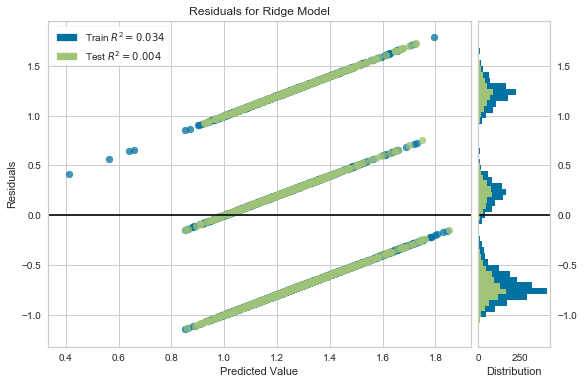

In [38]:
# Instantiate the linear model and visualizer # Insta 
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(x_treino, y_treino)  # Fit the training data to the visualizer
visualizer.score(x_teste, y_teste)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

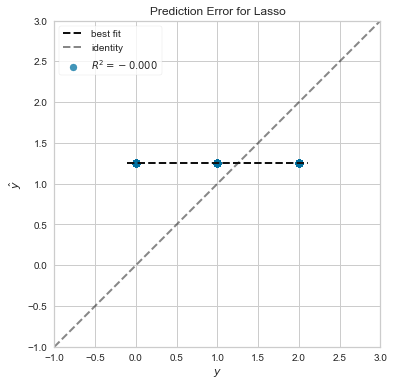

In [40]:
# Instantiate the linear model and visualizer # Insta 
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(x_treino, y_treino)  # Fit the training data to the visualizer
visualizer.score(x_teste, y_teste)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data